___

# Excercise : Titanic Dataset Analysis

Estimated time needed: **60** minutes


In this Exercise you will be given the dataset of Titanic ! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Also note that all of these questions can be answered with one line of code.
____

<div class="alert alert-block alert-info">
<b>Note:</b> This Notebook is created for Python Module
In case of any doubts contact to "sumit@theax.in".
</div>

___

## Load the Dataset
First, load the Titanic dataset. You can download it from Kaggle or Seaborn if you don’t already have it.

In [80]:
import seaborn as sns
dataset = sns.load_dataset('titanic')
print(dataset)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

## 2. Data Exploration
Explore the dataset to understand its structure and contents.

__Display the first 10 rows of the dataset.__

In [3]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


__Show the summary statistics of the dataset.__

In [4]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Check for missing values in each column.__

In [8]:
dataset.isnull().sum()  # sum is mandatory to be used to find out the counts in the dataset. 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3. Data Cleaning
Handle missing values and clean the dataset.

__Fill missing values in the ‘Age’ column with the median age.__

In [82]:
median_age = dataset['age'].median()

dataset['age'].fillna(median_age, inplace=True)  # inplace will help you to fill the null values in real time. 

/var/folders/0b/_lhktjtd7_nbl39rvt0kjvmr0000gn/T/ipykernel_80029/2021190981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].fillna(median_age, inplace=True)  # inplace will help you to fill the null values in real time.


In [14]:
# checking null values in age column
print(dataset['age'].isnull().sum())

0


__Fill missing values in the ‘Embarked’ column with the most frequent value.__

In [83]:
embarked_mode = dataset['embarked'].mode()
embarked_mode

dataset['embarked'].fillna(embarked_mode, inplace=True)

from scipy.stats import mode  # only when u have numerical columns

/var/folders/0b/_lhktjtd7_nbl39rvt0kjvmr0000gn/T/ipykernel_80029/4193722947.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['embarked'].fillna(embarked_mode, inplace=True)


In [32]:
# checking null values in embarked column
print(dataset['embarked'].isnull().sum())

0


__Drop the ‘deck’ column due to a high number of missing values.__

In [84]:
dataset.drop(columns=['deck'], inplace=True)

In [34]:
dataset.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## 3. Feature Engineering
Create new features to enhance the dataset.

__Create a new column ‘FamilySize’ by adding ‘SibSp’ and ‘Parch’.__

In [85]:
# Create 'FamilySize' column
dataset['FamilySize'] = dataset['sibsp'] + dataset['parch']

__Create a new column ‘IsAlone’ which is 1 if ‘FamilySize’ is 0, else 0.__

In [86]:
dataset['Isalone'] = 1  # Initialize to 1
dataset['Isalone'].loc[dataset['alone'] == False] = 0  # Update to 0 if FamilySize > 0

/var/folders/0b/_lhktjtd7_nbl39rvt0kjvmr0000gn/T/ipykernel_80029/1336858125.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Isalone'].loc[dataset['alone'] == False] = 0  # Update to 0 if FamilySize > 0
/var/folders/0b/_lhktjtd7_

In [58]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,FamilySize,Isalone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1,0
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,yes,True,0,1
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,Southampton,yes,False,1,0
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,Southampton,no,True,0,1


## 5. Data Analysis
Perform some analysis on the dataset.

__Calculate the survival rate for different classes (Pclass).__

In [66]:
dataset[['survived','pclass']].value_counts()/dataset.shape[0] * 100

survived  pclass
0         3         41.750842
1         1         15.039282
          3         13.355780
0         2         10.886644
1         2          9.764310
0         1          8.978676
S         S          0.224467
Name: count, dtype: float64

__Calculate the survival rate for different genders.__

In [69]:
dataset[['survived','sex']].value_counts()/dataset.shape[0] * 100

survived  sex   
0         male      52.525253
1         female    25.925926
          male      12.233446
0         female     9.090909
S         S          0.224467
Name: count, dtype: float64

__Calculate the survival rate for passengers traveling alone vs. with family.__

In [72]:
dataset[['survived','alone']].value_counts()/dataset.shape[0] * 100

survived  alone
0         True     41.975309
1         False    20.089787
0         False    19.640853
1         True     18.069585
S         True      0.224467
Name: count, dtype: float64

## 6. Data Visualization
Visualize the data to gain insights.

__Plot the distribution of ages.__

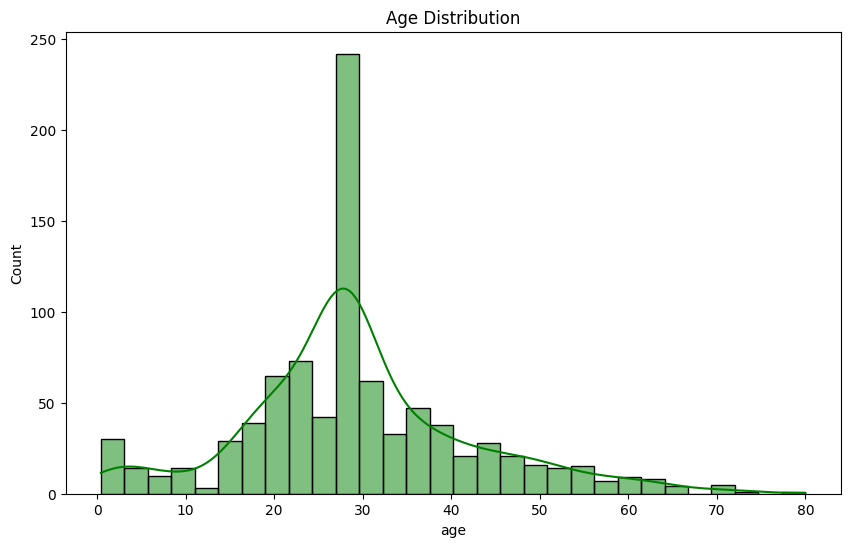

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'], bins=30, kde=True, color = 'green') # kernel density estimation
plt.title('Age Distribution')
plt.show()

__Plot the survival rate by class.__

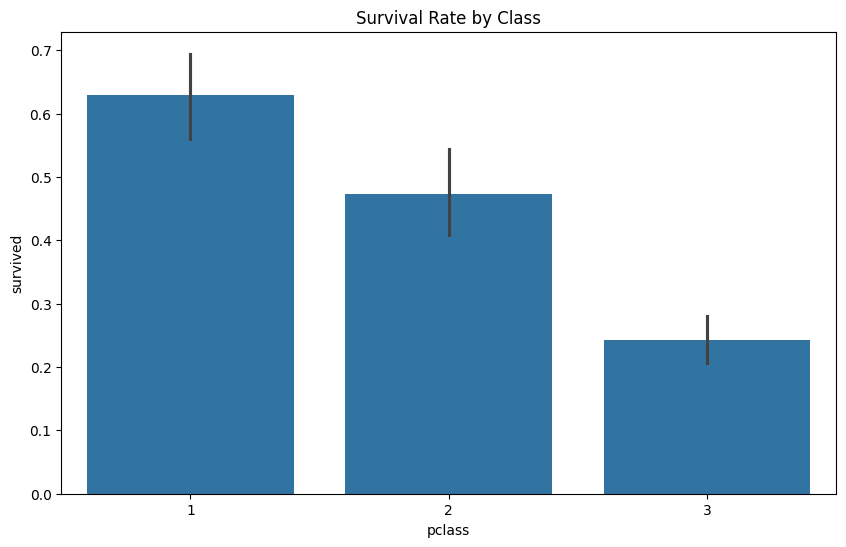

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=dataset)
plt.title('Survival Rate by Class')
plt.show()

__Plot the survival rate by gender.__

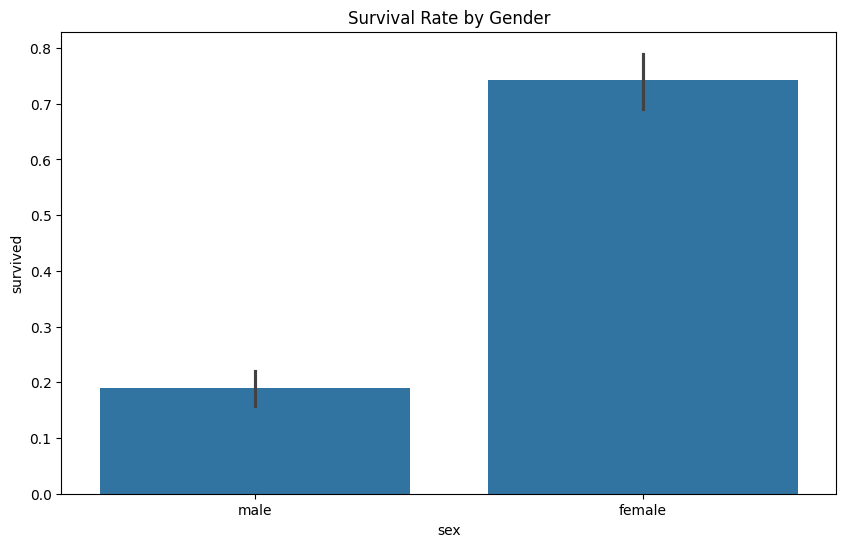

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=dataset)
plt.title('Survival Rate by Gender')
plt.show()

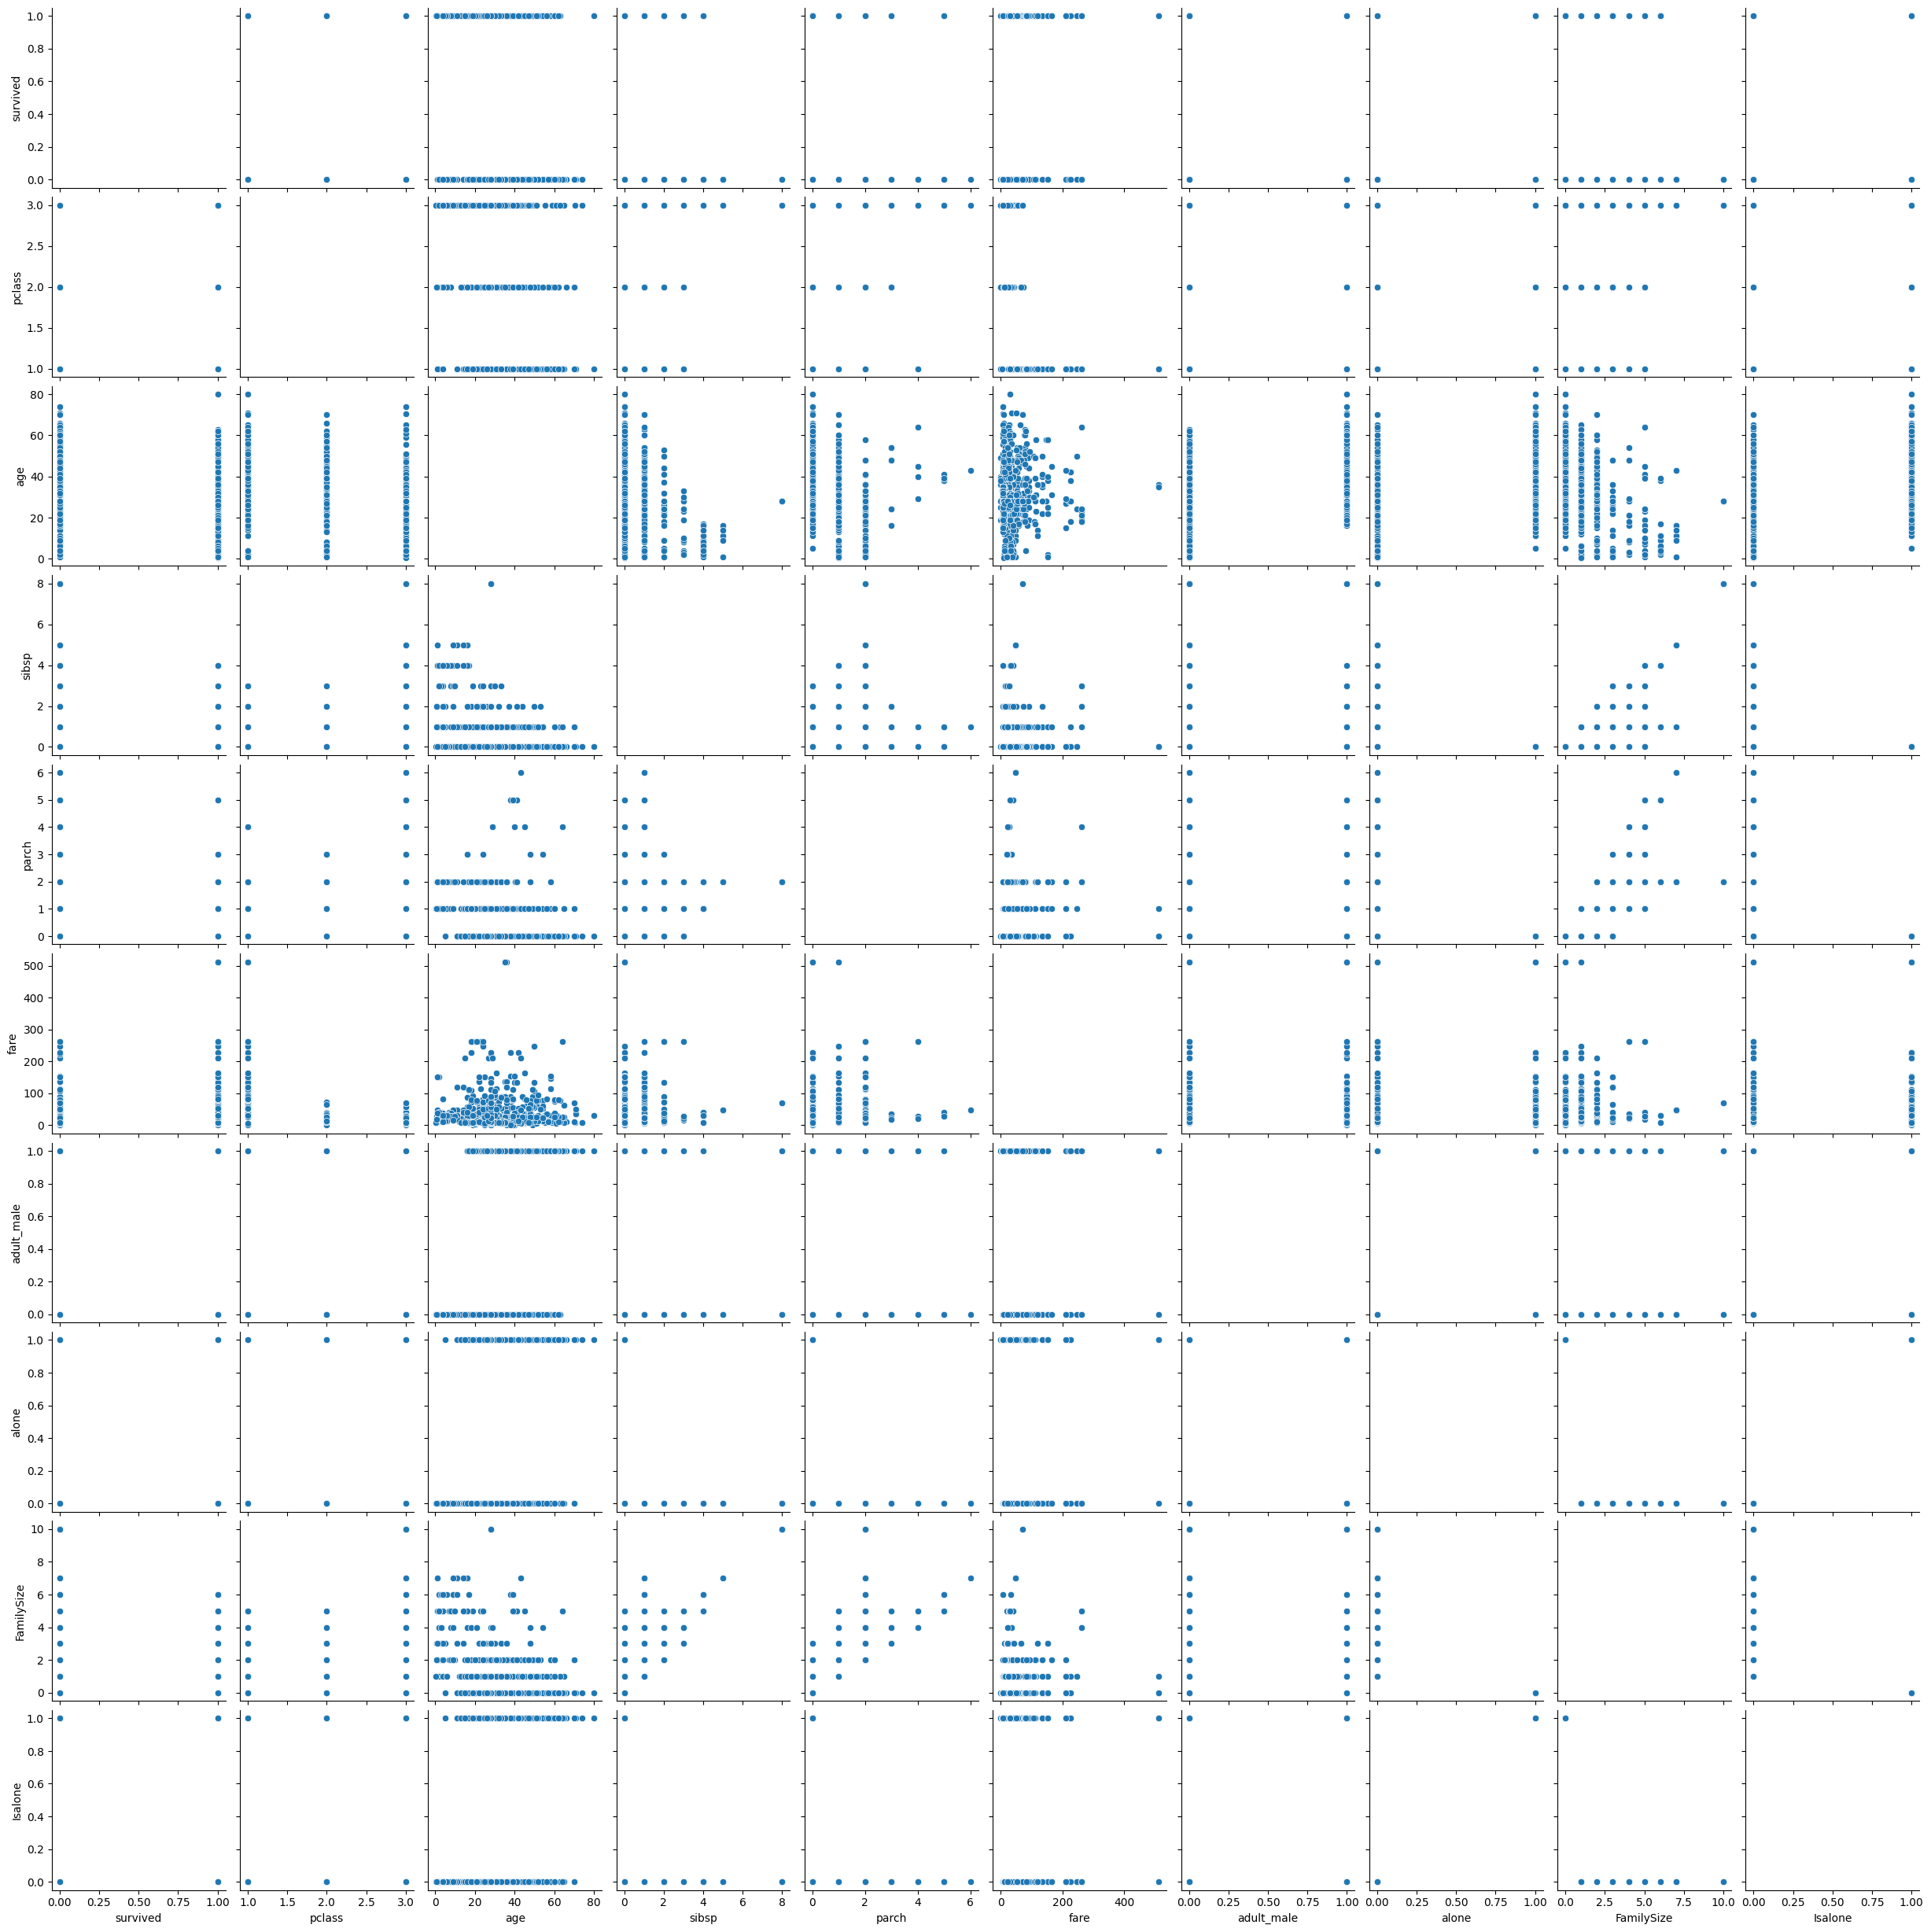

In [100]:
# Pairplot analysis 
sns.pairplot(dataset,diag_kind='reg')

### Similar Datasets

In [102]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
